In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np

In [3]:
FJoin = os.path.join

In [4]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [5]:
data_train_drive_link = '/content/drive/MyDrive/csvdata_notargument/Dataframe_training_final.csv'
label_train_drive_link = '/content/drive/MyDrive/csvdata_notargument/Labelframe_training_final.csv'

data_test_drive_link = '/content/drive/MyDrive/csvdata_notargument/Dataframe_testing_final.csv'
label_test_drive_link = '/content/drive/MyDrive/csvdata_notargument/Labelframe_testing_final.csv'

In [6]:
def read_data(link_data, link_label):
    data = pd.read_csv(link_data, header=None)
    label = pd.read_csv(link_label, header=None)
    return np.array(data), np.array(label).ravel()

In [7]:
data_train, label_train = read_data(data_train_drive_link, label_train_drive_link)
data_test, label_test = read_data(data_test_drive_link, label_test_drive_link)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score,precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import math

In [9]:
def change_to_char(num):
  listchar = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
  listnum = [i for i in range(0,89)]
  if (num >= 0 and num <= 88):
    k = listnum.index(num)
    return listchar[k]
  else:
    return -1

In [10]:
Scaler = MinMaxScaler()

data_train = Scaler.fit_transform(data_train)

data_test = Scaler.transform(data_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(data_train, label_train)
predicted = gnb.predict(data_test)

In [13]:
print("* MODEL: GAUSSION NAIVE BAYES")
print('       Accuracy = %.4f' % (accuracy_score(label_test, predicted)*100) + ' %\n')

* MODEL: GAUSSION NAIVE BAYES
       Accuracy = 29.0178 %



In [12]:
print(classification_report(predicted, label_test, target_names=f_data_final))

              precision    recall  f1-score   support

           a       0.78      0.67      0.72        57
          à       0.12      0.14      0.13        44
          á       0.38      0.11      0.17       174
          â       0.44      0.61      0.51        36
         ầ       0.02      0.07      0.03        14
         ấ       0.32      0.11      0.17       143
         ẫ       0.16      0.08      0.11        96
         ẩ       0.04      0.06      0.05        34
          ã       0.06      0.08      0.07        38
          ă       0.16      0.38      0.23        21
         ằ       0.16      0.20      0.18        40
         ắ       0.38      0.15      0.21       130
         ẵ       0.50      0.14      0.21       184
         ẳ       0.08      0.14      0.10        29
          ả       0.58      0.17      0.26       170
          ạ       0.70      0.54      0.61        65
         ậ       0.22      0.52      0.31        21
         ặ       0.50    

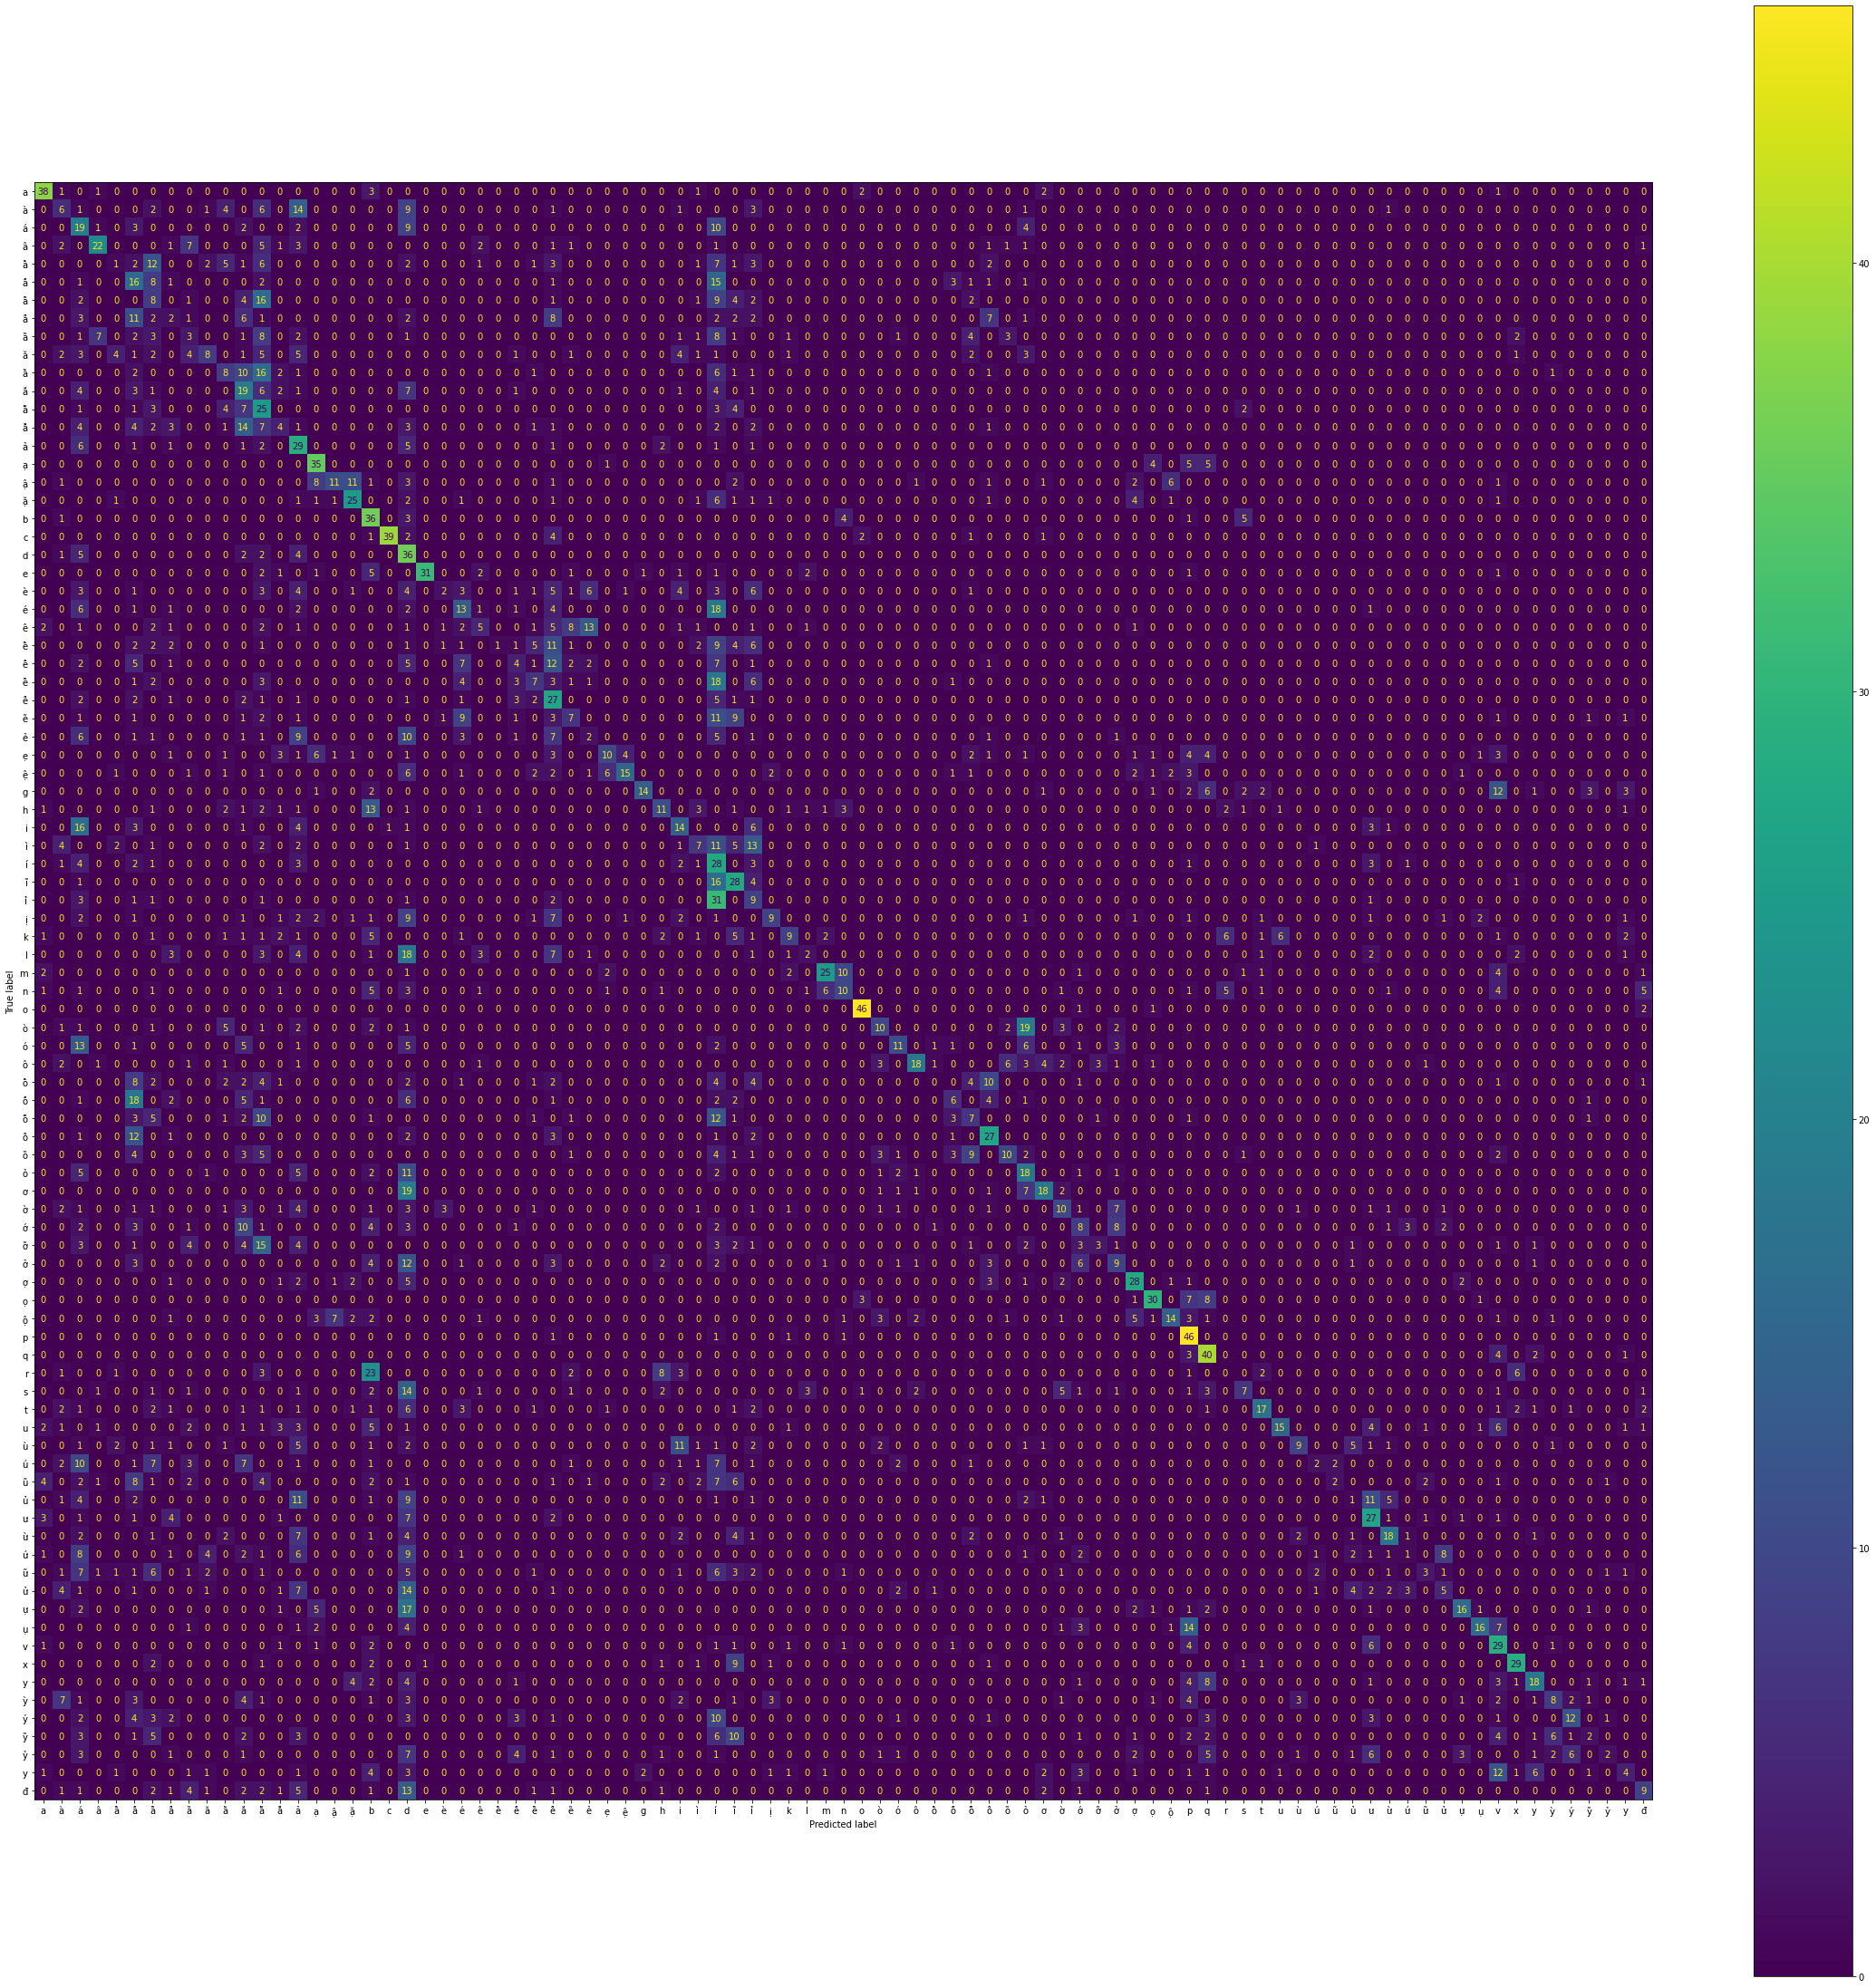

In [14]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 40, 40
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(gnb, data_test, label_test, display_labels=f_data_final)
plt.show()